In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
ld = pd.read_csv('DataSets/clean_loan_data_2017_rev.csv', encoding="ISO-8859-1", engine='python')
ld.head(2)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,11875,11875.0,36 months,11.44%,391.26,B,B4,Shop foreman,10+ years,MORTGAGE,...,25.0,0,0,319205,61637,24300,56205,N,Cash,N
1,1500,1500.0,36 months,5.32%,45.18,A,A1,Auto Technician,3 years,MORTGAGE,...,0.0,0,0,163700,10658,14000,5200,N,Cash,N


In [4]:
 # Use Pandas get_dummies to convert categorical data
ld_n = pd.get_dummies(ld)
ld_n.head()

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y
0,11875,11875.0,391.26,55000.0,34.50,0,0,75.0,14,0,...,0,0,1,0,1,0,1,0,1,0
1,1500,1500.0,45.18,67000.0,5.95,1,0,10.0,5,0,...,0,0,1,0,1,0,1,0,1,0
2,8500,8500.0,290.47,110000.0,9.84,2,1,18.0,9,0,...,0,0,1,0,1,0,1,0,1,0
3,10000,10000.0,335.69,52000.0,22.39,0,1,34.0,10,0,...,0,0,1,0,1,0,1,0,1,0
4,20000,20000.0,486.26,48000.0,22.98,0,0,78.0,9,0,...,0,0,1,0,1,0,1,0,1,0


In [5]:
print(ld_n.columns.values)

['loan_amnt' 'funded_amnt_inv' 'installment' ...
 'disbursement_method_DirectPay' 'debt_settlement_flag_N'
 'debt_settlement_flag_Y']


In [8]:
# Assign X (data) and y (target)
X = ld_n[['loan_amnt', 'annual_inc', 'dti']]
y = ld_n["delinq_2yrs"].values.reshape(-1, 1)
print(X.shape, y.shape)

(10524, 3) (10524, 1)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [11]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [12]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

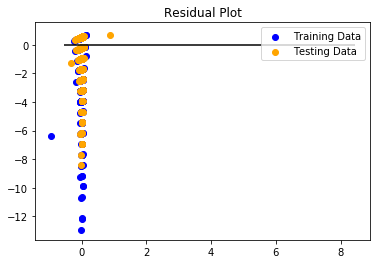

In [13]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [14]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.835260594139565, R2: 0.0009076117648159077


In [15]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8353809054356378, R2: 0.0007637020664913452


In [16]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.835260593417519, R2: 0.0009076126284872643


In [17]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8352127921365251, R2: 0.0009647898691280687
